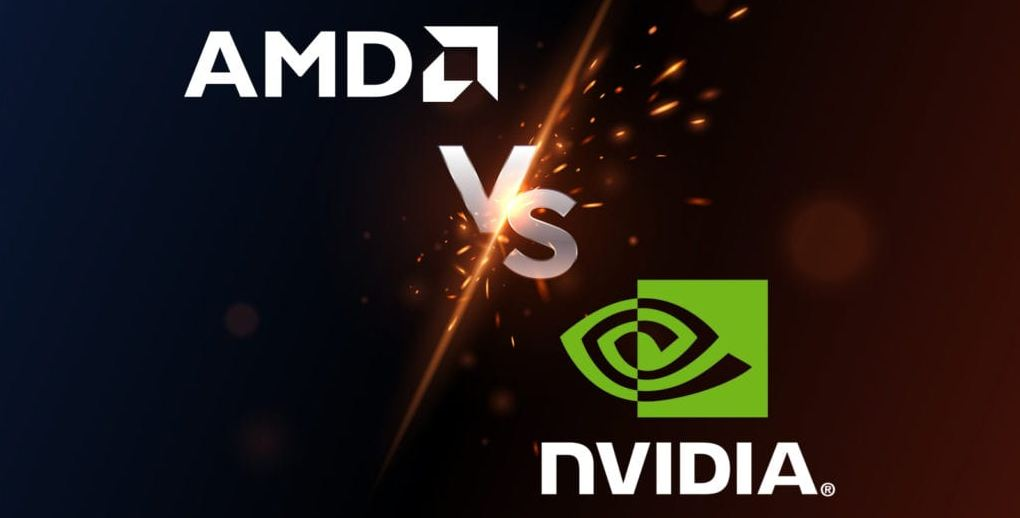

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('gpu_specs_v6.csv')

In [3]:
df

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.000,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.000,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.000,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.000,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.000,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,3dfx,Voodoo5 5000 AGP,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2885,3dfx,Voodoo5 5000 PCI,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,PCI,SDR,VSA-100
2886,3dfx,Voodoo5 6000,NaN,0.032,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2887,Intel,Xe DG1,NaN,4.000,128.0,900,2133.0,640.0,40,20,NaN,NaN,No,PCIe 4.0 x8,LPDDR4X,DG1


In [4]:
df.isnull().sum()

manufacturer        0
productName         0
releaseYear        44
memSize           412
memBusWidth       412
gpuClock            0
memClock          412
unifiedShader     824
tmu                 0
rop                 0
pixelShader      2065
vertexShader     2065
igp                 0
bus                 0
memType             0
gpuChip             0
dtype: int64

In [5]:
df.drop(['pixelShader', 'vertexShader'], axis=1, inplace=True)

In [6]:
df['releaseYear'].replace(np.nan, '0.0', inplace=True)
df['memSize'].replace(np.nan, '0.0', inplace=True)
df['memBusWidth'].replace(np.nan, '0.0', inplace=True)
df['memClock'].replace(np.nan, '0.0', inplace=True)
df['unifiedShader'].replace(np.nan, '0.0', inplace=True)

In [7]:
df.isnull().sum()

manufacturer     0
productName      0
releaseYear      0
memSize          0
memBusWidth      0
gpuClock         0
memClock         0
unifiedShader    0
tmu              0
rop              0
igp              0
bus              0
memType          0
gpuChip          0
dtype: int64

In [8]:
print(df.dtypes)

manufacturer     object
productName      object
releaseYear      object
memSize          object
memBusWidth      object
gpuClock          int64
memClock         object
unifiedShader    object
tmu               int64
rop               int64
igp              object
bus              object
memType          object
gpuChip          object
dtype: object


In [9]:
df['releaseYear'] = df['releaseYear'].astype(float)
df['memSize'] = df['memSize'].astype(float)
df['memBusWidth'] = df['memBusWidth'].astype(float)
df['memClock'] = df['memClock'].astype(float)
df['unifiedShader'] = df['unifiedShader'].astype(float)

In [10]:
df['memSize'] = np.floor(df['memSize']).astype(int)
df['memBusWidth'] = np.floor(df['memBusWidth']).astype(int)
df['releaseYear'] = np.floor(df['releaseYear']).astype(int)
df['memClock'] = np.floor(df['memClock']).astype(int)
df['unifiedShader'] = np.floor(df['unifiedShader']).astype(int)

In [11]:
#def remove_trailing_zero(x):
 #   if isinstance(x, str) and x.endwidth('.0'):
  #      return x[:-2]
   # else:
    #    return x

In [12]:
#df = df.applymap(remove_trailing_zero)

## Holding Market By Manufacturers

In [13]:
s = df['manufacturer'].value_counts()
l = ['NVIDIA', 'AMD', 'ATI', 'Intel', 'Matrox', '3dfx', 'XGI', 'Sony']
e = [0.1,0,0,0,0.1,0.2,0.3,0.4]
color = ['lawngreen', 'black', 'orangered', 'mediumblue', 'darkviolet', 'chocolate', 'lightcoral', 'dimgray']

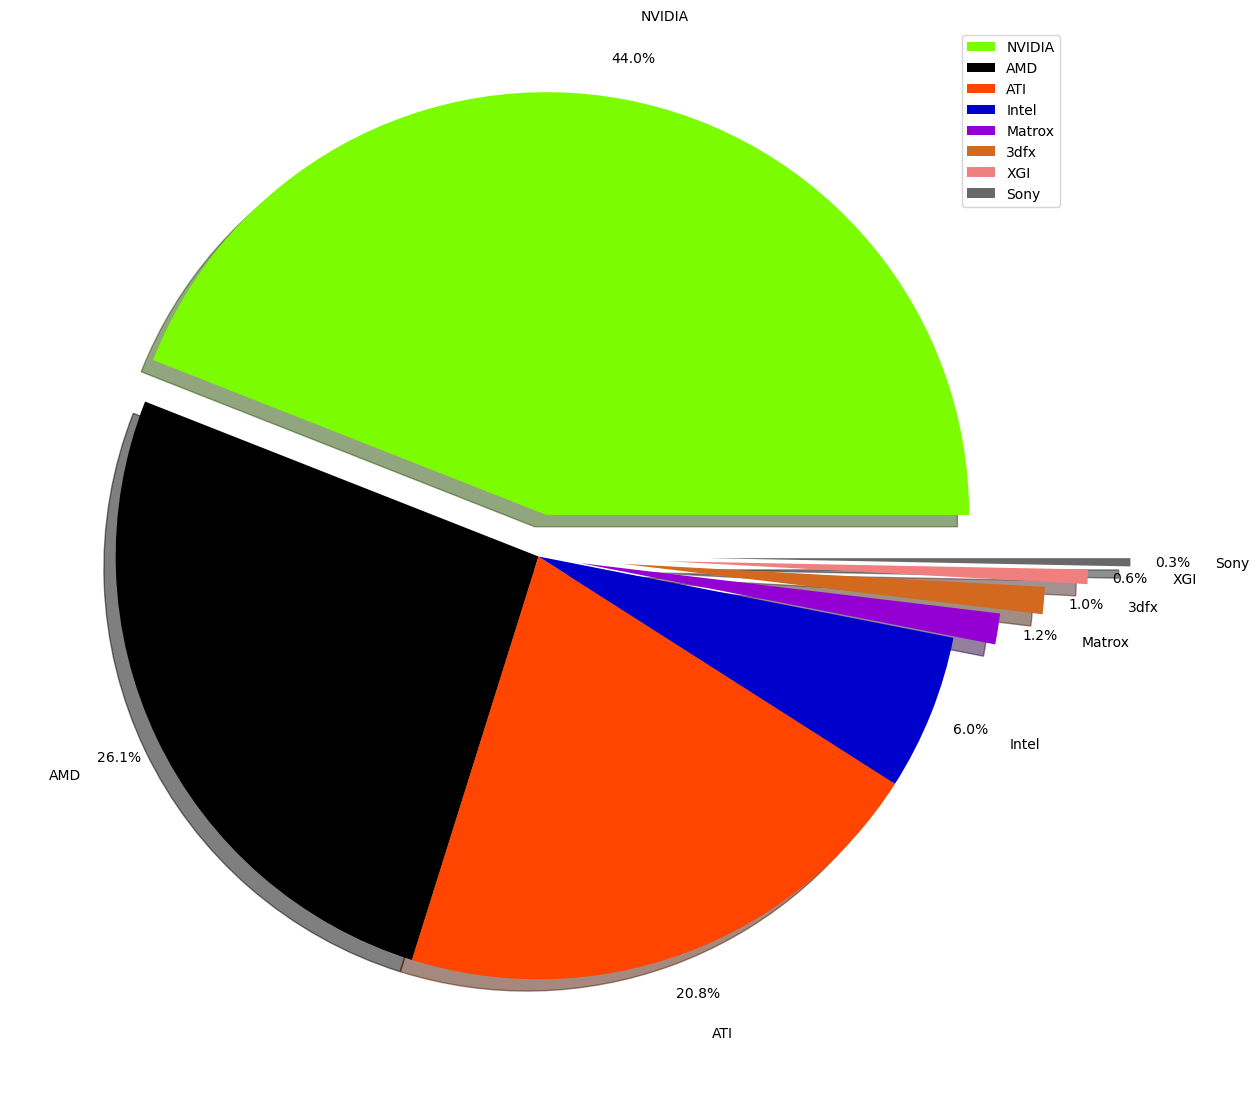

In [14]:
plt.figure(figsize=(14,14),dpi=100)
plt.pie(s, labels=l, autopct="%1.1f%%", shadow=True, pctdistance=1.1, labeldistance=1.2, colors=color, explode=e)
plt.legend(loc='upper right', fontsize=10)
plt.show()


In [15]:
df[(df['memSize']>4) & (df['memBusWidth']>128) & (df['releaseYear']>2021)][['manufacturer','productName','releaseYear','memSize', 'memBusWidth','igp']]

,manufacturer,productName,releaseYear,memSize,memBusWidth,igp
5,Intel,Arc A730M,2022,12,192,No
6,Intel,Arc A770,2022,16,256,No
7,Intel,Arc A770M,2022,16,256,No
8,Intel,Arc A780,2022,16,256,No
9,Intel,Arctic Sound-M,2022,16,4096,No
16,NVIDIA,GeForce RTX 3060 Ti GA103,2022,8,256,No
17,NVIDIA,GeForce RTX 3070 Ti Mobile,2022,8,256,No
18,NVIDIA,GeForce RTX 3080 12 GB,2022,12,384,No
19,NVIDIA,GeForce RTX 3080 Ti 20 GB,2022,20,320,No
20,NVIDIA,GeForce RTX 3080 Ti Max-Q,2022,16,256,No


In [16]:
performance = df.groupby('manufacturer')[['gpuClock', 'memClock']].mean()
performance.style.background_gradient(cmap='winter_r')

,gpuClock,memClock
manufacturer,,
3dfx,152.033333,152.033333
AMD,862.038411,967.806623
ATI,439.520799,428.445923
Intel,391.790698,192.633721
Matrox,172.147059,212.794118
NVIDIA,716.031447,873.356918
Sony,128.888889,136.888889
XGI,328.125000,387.937500


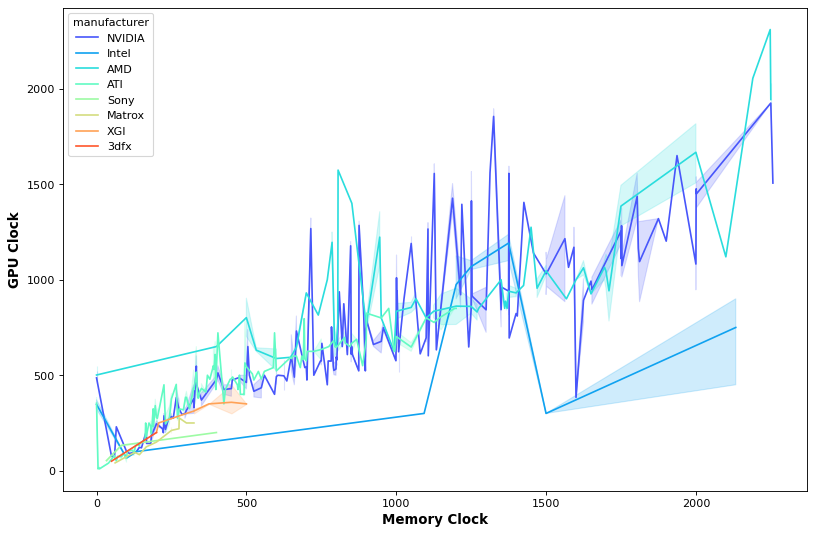

In [17]:
plt.figure(figsize=(12,8),dpi=80)
sns.lineplot(data=df, x='memClock', y='gpuClock', hue='manufacturer', palette='rainbow')
plt.ylabel('GPU Clock', fontsize=12, fontweight='bold')
plt.xlabel('Memory Clock', fontsize=12, fontweight='bold')
plt.show()

In [18]:
memories = df.groupby('manufacturer')[['memSize', 'memBusWidth']].mean()
memories.style.background_gradient(cmap='viridis')

,memSize,memBusWidth
manufacturer,,
3dfx,0.000000,132.266667
AMD,3.765563,291.178808
ATI,0.138103,132.153078
Intel,1.255814,101.581395
Matrox,0.000000,107.294118
NVIDIA,3.365566,269.459119
Sony,0.000000,1265.777778
XGI,0.000000,148.000000


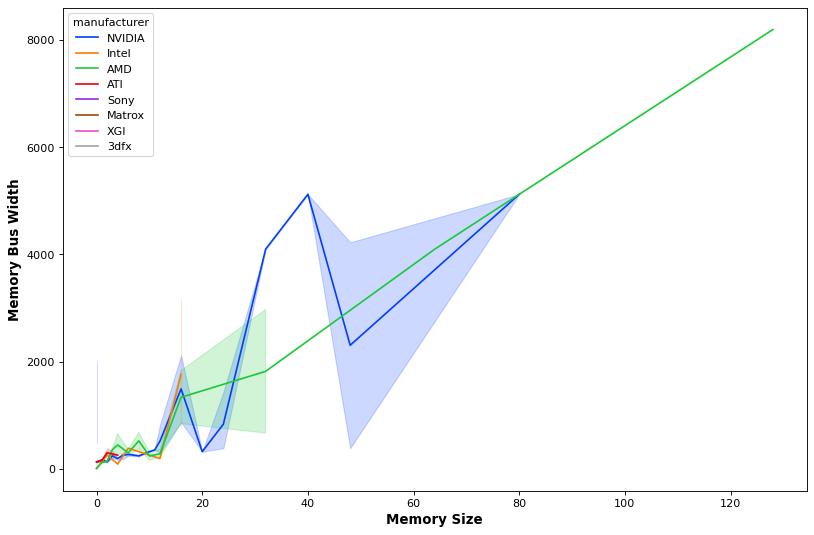

In [19]:
plt.figure(figsize=(12,8),dpi=80)
sns.lineplot(data=df, x='memSize', y='memBusWidth', hue='manufacturer', palette='bright')
plt.ylabel('Memory Bus Width', fontsize=12, fontweight='bold')
plt.xlabel('Memory Size', fontsize=12, fontweight='bold')
plt.show()

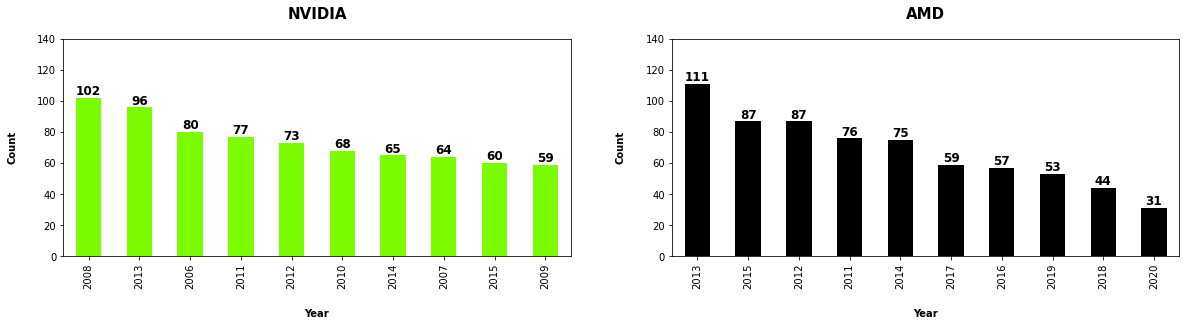

In [20]:
nvidia = df.loc[df.manufacturer == 'NVIDIA']
amd = df.loc[df.manufacturer == 'AMD']

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
ax1 = nvidia.releaseYear.value_counts().head(10).plot(kind='bar', color='lawngreen')
plt.xlabel('Year', fontweight='bold', labelpad=20)
plt.ylabel('Count', fontweight='bold', labelpad=20)
plt.title('NVIDIA', fontweight='bold', fontsize=15, pad=20)
plt.yticks(np.arange(0,141,20))


plt.subplot(1, 2, 2)
ax2 = amd.releaseYear.value_counts().head(10).plot(kind='bar', color='black')
plt.xlabel('Year', fontweight='bold', labelpad=20)
plt.ylabel('Count', fontweight='bold', labelpad=20)
plt.title('AMD', fontweight='bold', fontsize=15, pad=20)
plt.yticks(np.arange(0,141,20))

for container in ax1.containers:
    ax1.bar_label(container, fontsize=12, fontweight='bold')
for container in ax2.containers:
    ax2.bar_label(container, fontsize=12, fontweight='bold')
    
    
plt.show()



In [21]:
df['memType'].value_counts()

GDDR5            724
GDDR3            471
System Shared    412
DDR              336
DDR3             313
GDDR6            191
DDR2             163
SDR               96
HBM2              56
GDDR5X            18
DRAM              17
GDDR6X            14
HBM2e             14
GDDR4             13
EDO               11
HBM                7
VRAM               7
eDRAM              6
DDR4               6
LPDDR4X            4
GDDR2              3
SGR                2
SGRAM              1
CDRAM              1
LPDDR5             1
HBM3               1
FPM                1
Name: memType, dtype: int64

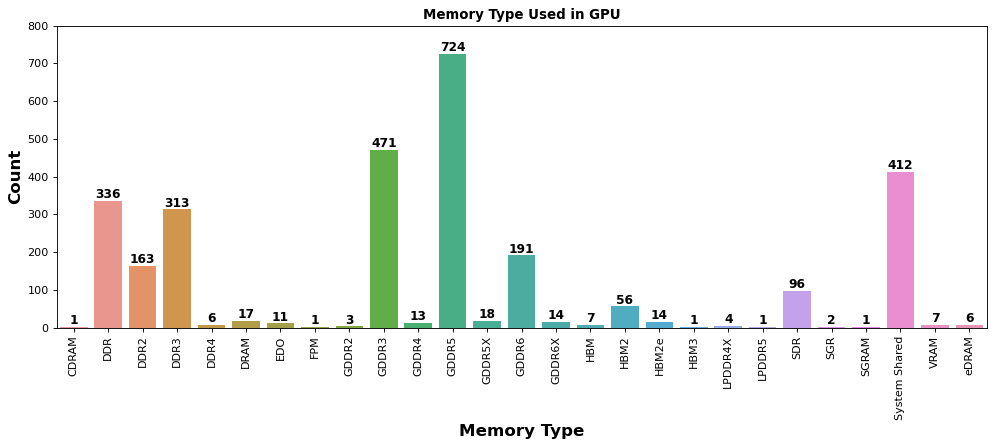

In [22]:
plt.figure(figsize=(15, 5), dpi=80)
co = df.groupby('memType')['manufacturer'].count().index
ax = sns.countplot(data=df, x='memType', order=co)
plt.xticks(rotation=90)
plt.title('Memory Type Used in GPU', fontweight='bold')
plt.yticks(np.arange(0,801,100))
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.xlabel('Memory Type', fontsize=15, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, fontsize=11, fontweight='bold')

plt.show()

In [23]:
df['igp'].value_counts()

No     2477
Yes     412
Name: igp, dtype: int64

In [24]:
df[(df['igp'] == 'Yes')]['manufacturer'].value_counts()

Intel     147
AMD       147
NVIDIA     68
ATI        50
Name: manufacturer, dtype: int64

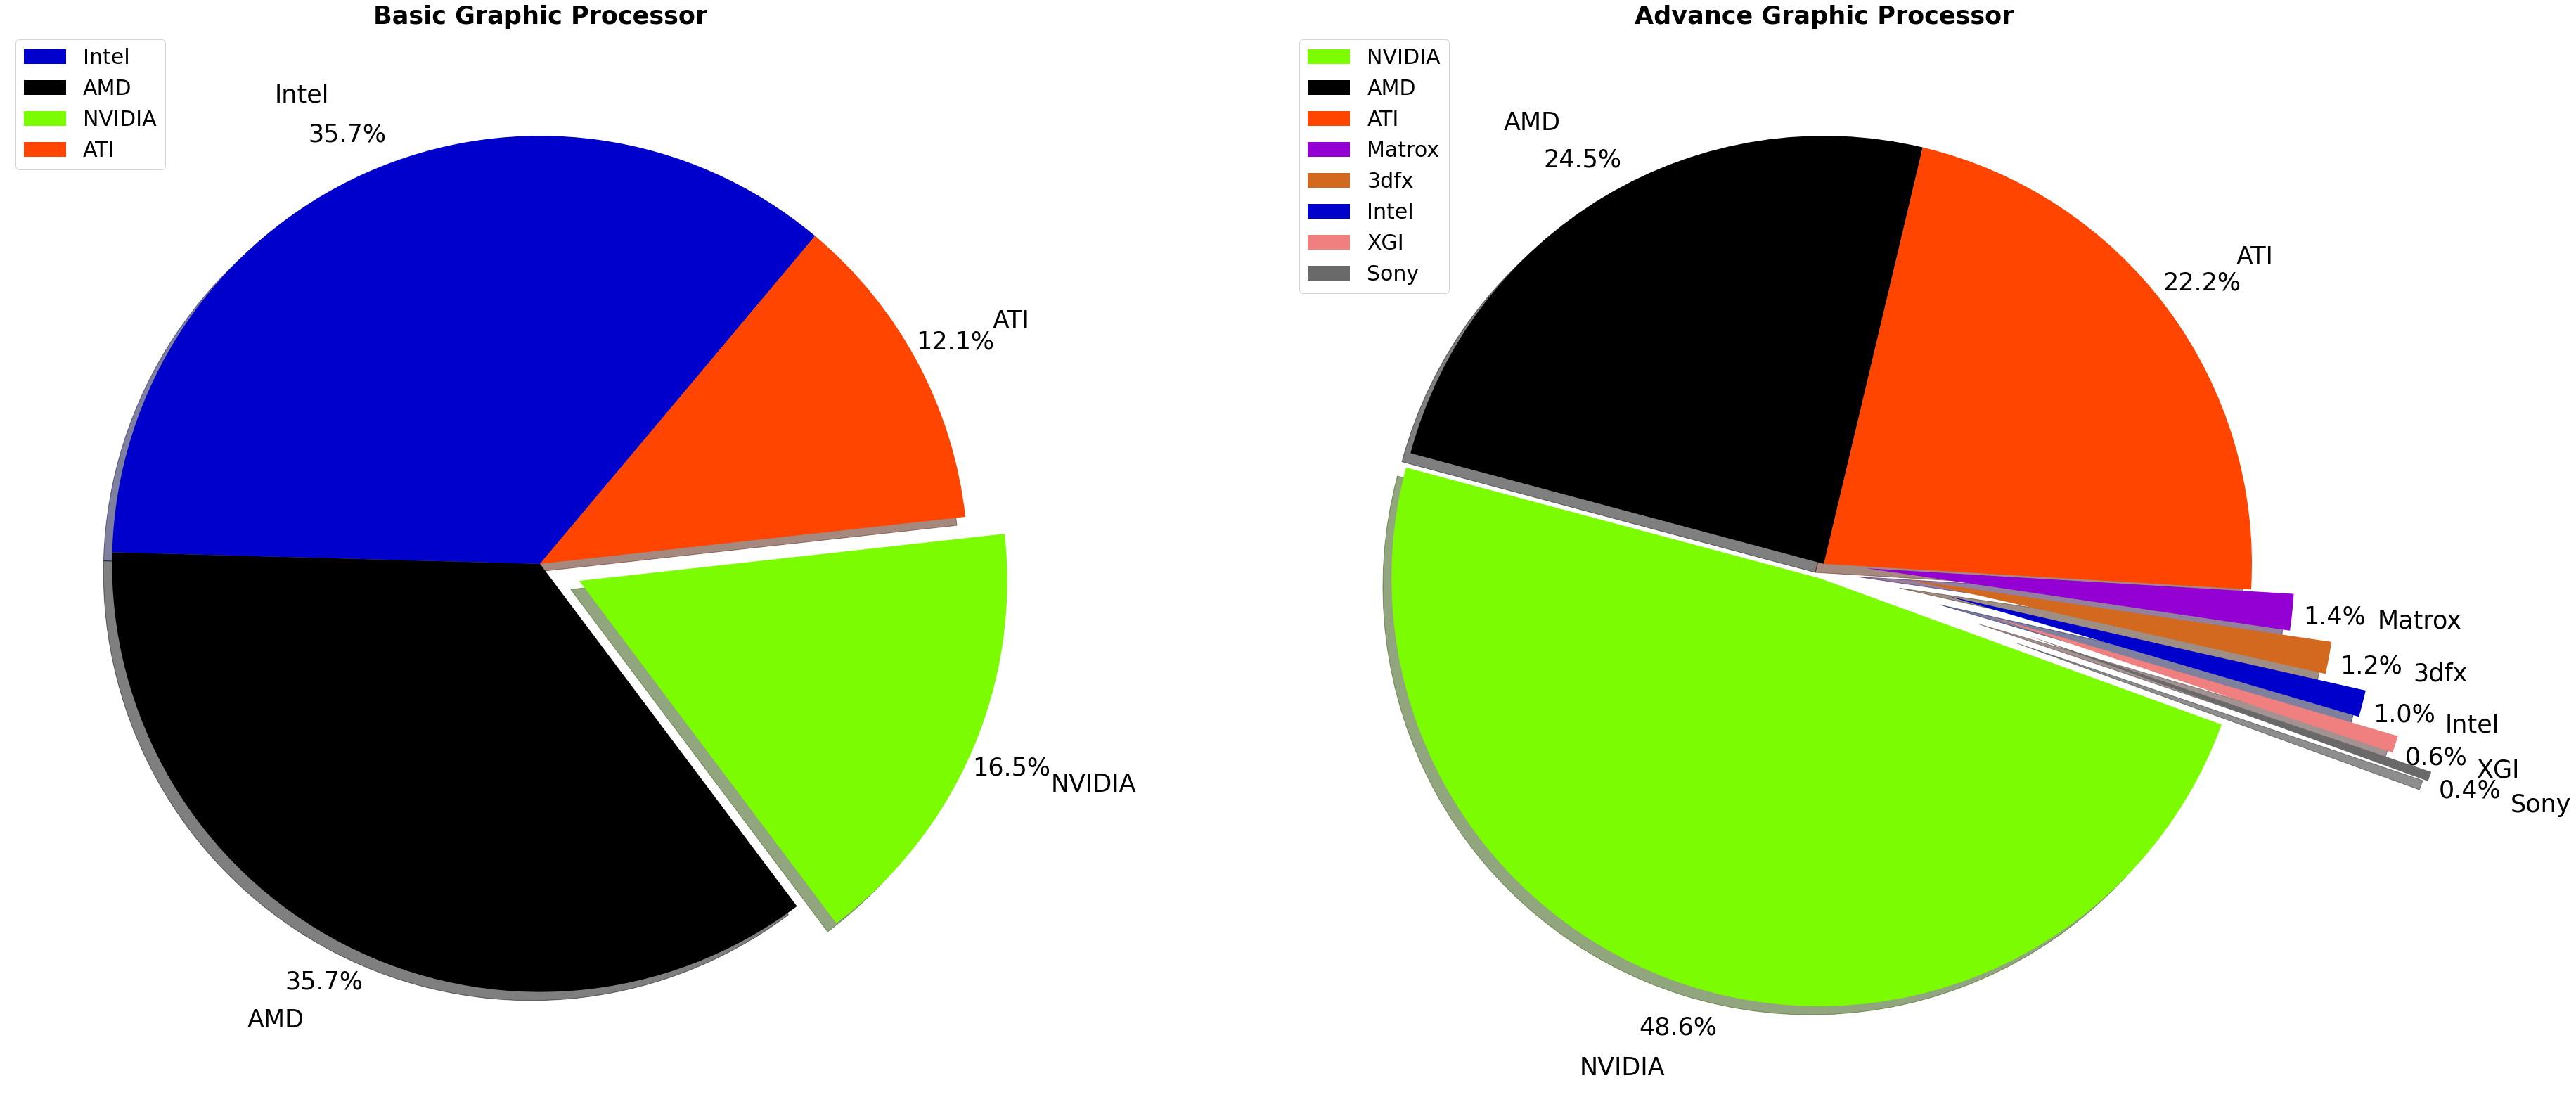

In [25]:
insert_igp = df[(df['igp'] == 'Yes')]['manufacturer'].value_counts()
noninsert_igp = df[(df['igp'] == 'No')]['manufacturer'].value_counts()
label1 = ['Intel', 'AMD', 'NVIDIA', 'ATI']
label2 = ['NVIDIA','AMD', 'ATI', 'Matrox', '3dfx', 'Intel', 'XGI', 'Sony' ]
color1 = ['mediumblue', 'black', 'lawngreen', 'orangered']
color2 = ['lawngreen', 'black', 'orangered', 'darkviolet','chocolate', 'mediumblue', 'lightcoral', 'dimgray']
e1 = [0,0,0.1,0]
e2 = [0.035,0,0,0.1,0.2,0.3,0.4,0.5]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60, 30))


ax1.pie(insert_igp, labels=label1, textprops={'fontsize': 35}, colors=color1, autopct="%1.1f%%", shadow=True, explode=e1,
       pctdistance=1.1, startangle=50, labeldistance=1.2)
ax1.legend(loc='upper left',fontsize=30)
ax1.set_title('Basic Graphic Processor',fontweight='bold', fontsize=35)


ax2.pie(noninsert_igp, labels=label2, textprops={'fontsize': 35}, colors=color2, autopct="%1.1f%%", shadow=True, explode=e2,
       pctdistance=1.1, startangle=340, counterclock=False, labeldistance=1.2)
ax2.legend(loc='upper left', fontsize=30)
ax2.set_title('Advance Graphic Processor', fontweight='bold', fontsize=35)

#plt.rcParams['font.size'] = 20

plt.show()

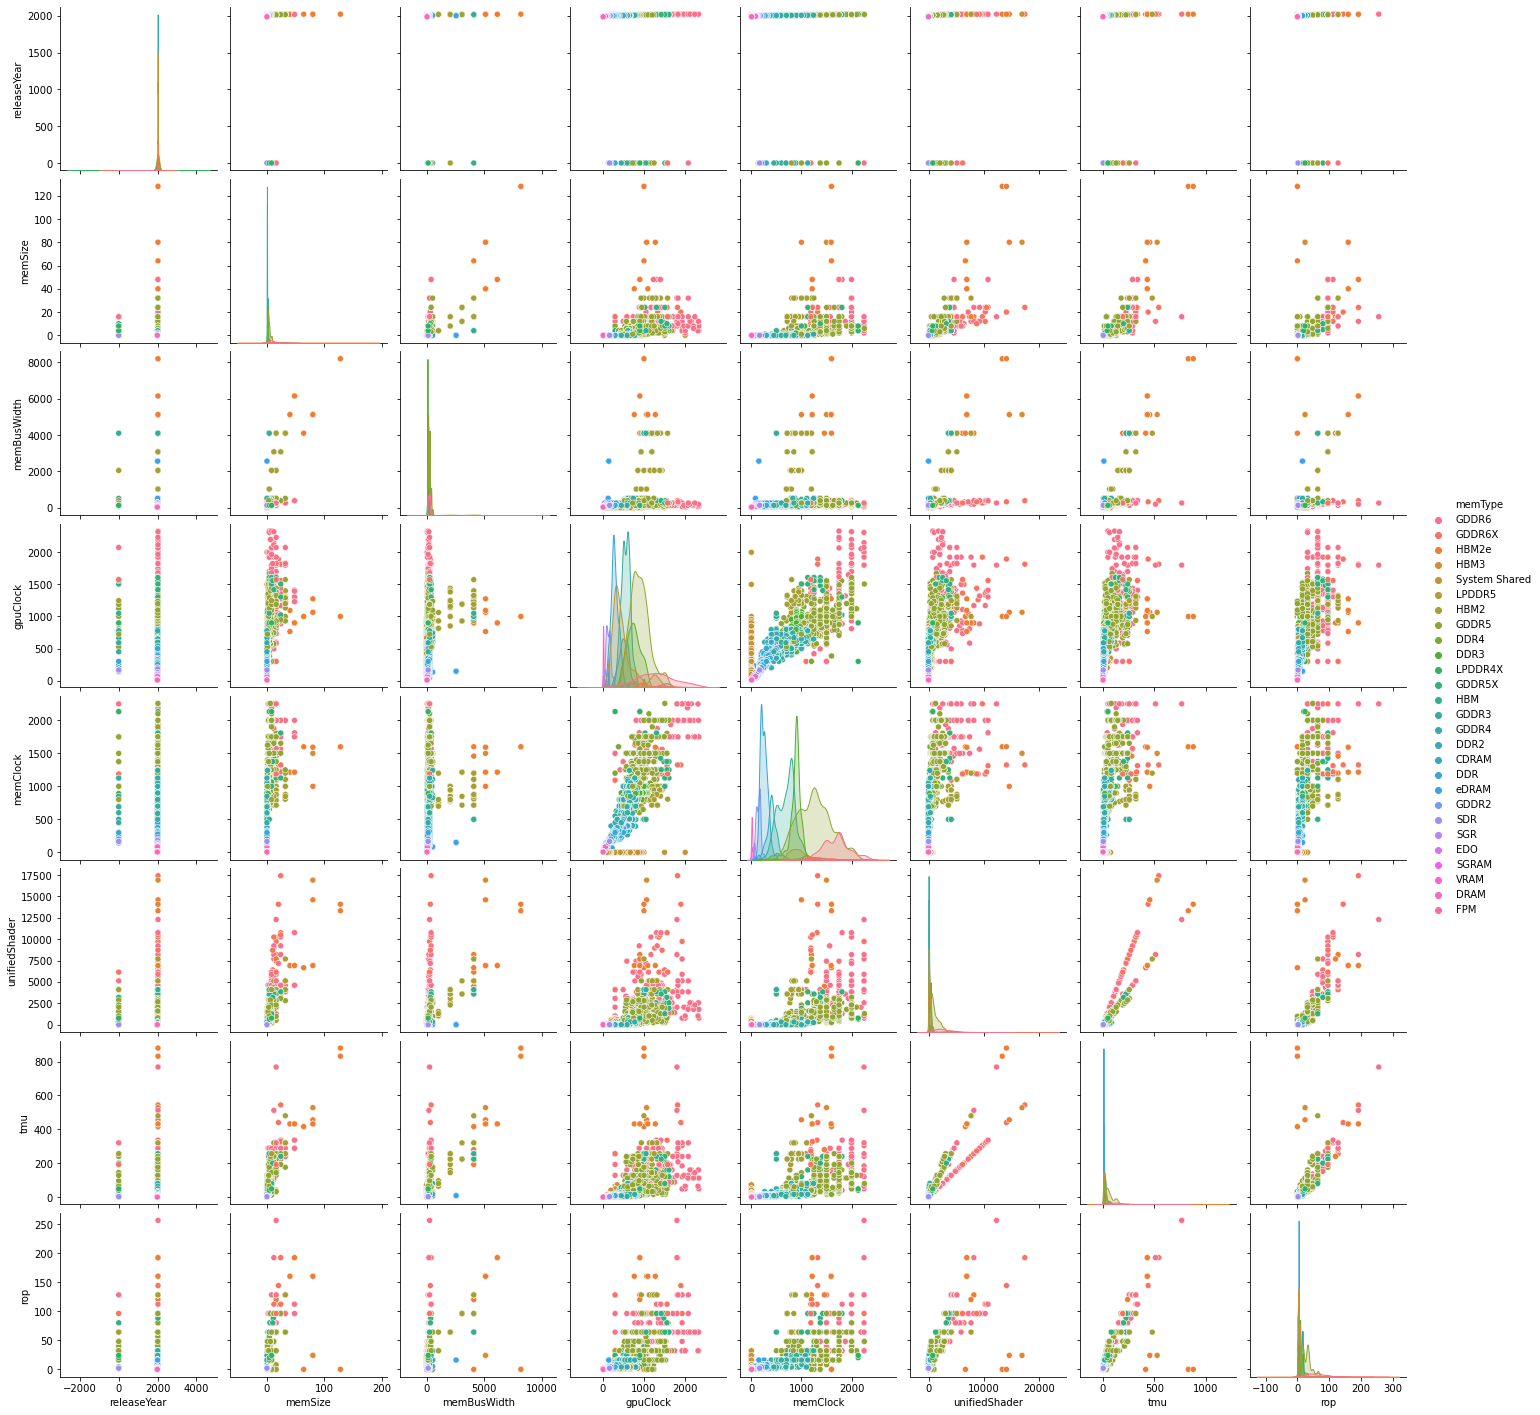

In [29]:
sns.pairplot(data=df, hue='memType')
plt.show()

In [27]:
feature = df.loc[:,['memType', 'memSize', 'gpuClock', 'memClock', 'memBusWidth']]
feature.head()


,memType,memSize,gpuClock,memClock,memBusWidth
0,GDDR6,8,1925,2250,128
1,GDDR6,4,300,1500,64
2,GDDR6,4,300,1500,64
3,GDDR6,4,300,1500,64
4,GDDR6,8,300,1500,128


In [28]:
g = feature.groupby('memType').mean()
g.style.background_gradient(cmap='PuBu')

,memSize,gpuClock,memClock,memBusWidth
memType,,,,
CDRAM,0.000000,200.000000,400.000000,64.000000
DDR,0.000000,285.627976,246.526786,130.666667
DDR2,0.067485,502.601227,413.245399,100.515337
DDR3,1.453674,745.386581,863.543131,90.785942
DDR4,4.000000,624.666667,1283.333333,85.333333
DRAM,0.000000,15.941176,14.823529,43.294118
EDO,0.000000,59.545455,60.545455,93.090909
FPM,0.000000,75.000000,50.000000,64.000000
GDDR2,0.000000,458.333333,451.000000,128.000000
